In [12]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import pandas as pd
import numpy as np


In [13]:
! pip3 install psycopg2-binary

In [173]:
df = pd.read_csv("out_final.csv",low_memory=False)

In [174]:
df

Unnamed: 0            id  \
0              0  2.539000e+03   
1              1  2.595000e+03   
2              2  5.121000e+03   
3              3  4.591000e+04   
4              4  5.136000e+03   
...          ...           ...   
39877      39876  4.372850e+07   
39878      39877  4.457889e+07   
39879      39878  4.635509e+07   
39880      39879  6.981956e+17   
39881      39880  4.897150e+07   

                                           listing_url  \
0                    https://www.airbnb.com/rooms/2539   
1                    https://www.airbnb.com/rooms/2595   
2                    https://www.airbnb.com/rooms/5121   
3                   https://www.airbnb.com/rooms/45910   
4                    https://www.airbnb.com/rooms/5136   
...                                                ...   
39877            https://www.airbnb.com/rooms/43728504   
39878            https://www.airbnb.com/rooms/44578886   
39879            https://www.airbnb.com/rooms/46355090   
39880  https://www.airbnb.com/rooms/698195550745703156   
39881            https://www.airbnb.com/rooms/48971505   

                                                    name  \
0                     Clean & quiet apt home by the park   
1                                  Skylit Midtown Castle   
2                                        BlissArtsSpace!   
3                     Beautiful Queens Brownstone! - 5BR   
4               Spacious Brooklyn Duplex, Patio + Garden   
...                                                  ...   
39877                  Private Modern House by The Beach   
39878               Beautiful apartment - minutes to NYC   
39879                1 Bedroom Basement, NEWLY Renovated   
39880  Luxurious private waterfront terrace, 2BR 2BA Apt   
39881           Just Blocks to Grove PATH and JC Med Ctr   

                                             description  \
0      Renovated apt home in elevator building.<br />...   
1      Beautiful, spacious skylit studio in the heart...   
2      One room available for rent in a 2 bedroom apt...   
3      <b>The space</b><br />Beautiful, fully furnish...   
4      We welcome you to stay in our lovely 2 br dupl...   
...                                                  ...   
39877  Private modern house by the Beach with all com...   
39878  Our apartment is straight across the river fro...   
39879  With easy access to multiple bus stops and the...   
39880  This two bed, two bath apartment overlooking t...   
39881  Very convenient to the Grove St PATH (5 min wa...   

                                   neighborhood_overview  \
0        Close to Prospect Park and Historic Ditmas Park   
1      Centrally located in the heart of Manhattan ju...   
2                                      No text available   
3                                      No text available   
4                                      No text available   
...                                                  ...   
39877  Rockaway Beach is a neighborhood that gives it...   
39878  Our apartment is located in a very interesting...   
39879                                  No text available   
39880                                  No text available   
39881                                  No text available   

                                             picture_url    host_location  \
0      https://a0.muscache.com/pictures/3949d073-a02e...     New York, NY   
1      https://a0.muscache.com/pictures/f0813a11-40b2...     New York, NY   
2      https://a0.muscache.com/pictures/2090980c-b68e...     New York, NY   
3      https://a0.muscache.com/pictures/27117627/19ff...     New York, NY   
4      https://a0.muscache.com/pictures/miso/Hosting-...     New York, NY   
...                                                  ...              ...   
39877  https://a0.muscache.com/pictures/6c950656-b090...     New York, NY   
39878  https://a0.muscache.com/pictures/dd5163c1-7e02...     New York, NY   
39879  https://a0.muscache.com/pictures/64c8

In [175]:
df = df.iloc[:,1:]

In [176]:
df['id']=df['id'].astype('int')

In [177]:
df[df['id']==0]

id listing_url name                                        description  \
7607   0         0.0    f  https://a0.muscache.com/im/pictures/user/19857...   

     neighborhood_overview picture_url host_location          host_about  \
7607          Williamsburg         1.0           4.0  ['email', 'phone']   

     host_response_rate host_acceptance_rate  ... review_scores_checkin  \
7607                  t                    t  ...                   0.0   

     review_scores_communication review_scores_location review_scores_value  \
7607                         0.0                    NaN                 NaN   

      instant_bookable calculated_host_listings_count  \
7607               NaN                            NaN   

     calculated_host_listings_count_entire_homes  \
7607                                         NaN   

     calculated_host_listings_count_private_rooms  \
7607                                          NaN   

     calculated_host_listings_count_shared_rooms  reviews_per_month  
7607                                         NaN                NaN  

[1 rows x 46 columns]

In [178]:
df.isnull().values.any()

True

In [179]:
df = df.dropna()
# df

In [180]:
print(df['accommodates'].dtype)
print(df['property_type'].dtype)
print(df['price'].dtype)
print(df['maximum_nights'].dtype)
print(df['minimum_nights'].dtype)
df['accommodates'] = df['accommodates'].astype("string")
df['property_type'] = df['property_type'].astype("string")

object
object
float64
float64
float64


In [181]:
#### Determine Filters for required cols#####

#filter where price is not equal to zero
df = df[df['price']!=0]
# determin ranges for each column we ask user to input
# filter based on range of prices,property_type,accommodates,maximum_nights, minimum_nights,review_scores_rating

# price
min_price = df['price'].min()
max_price = df['price'].max()

# print(min_price)
# print(max_price)
price_uniq_values = [i for i in df['price'].unique()]
# <100, 100-500,200-300,300-400,400-500,500-600,600-700,700-800,800-900,900-1000,1000-1100,1100-1200,1200-1300,1300-1400,1400-1500
# 1500-1600,1600-1700,1700-1800,1800-1900,1900-2000
# 2000-3000
# 3000-4000
# 4000-5000
# 5000-6000
# 6000-7000
# 7000-8000
# 8000-9000
# 9000-10000
# >10000

# They can have all these options unless we want to add a column to catogarize further
property_type_unique= [i for i in df['property_type'].unique()]
print(property_type_unique)
# accommodates_unique can be a range like 2-4,4-6,6-8,8-10,10-12,12-14,14-16,16-20,>20
accommodates_unique = [i for i in df['accommodates'].unique()]
print(accommodates_unique)

# this can be a range for user to select, because of many values.
# 1-2,2-5,5-10,10-15,15-20,20-25,25-30,30-50,>50
max_nights_unique= [i for i in df['maximum_nights'].unique()]

# this can be a range for user to select,because of many values
# 1-2,2-5,5-10,10-15,15-20,20-25,25-30,30-50,>50
min_nights_unique= [i for i in df['minimum_nights'].unique()]

# print(df['minimum_nights'].max())
# print(df['minimum_nights'].min())

# f"SELECT * FROM airbnb_final WHERE price < {user_input_price_max} AND price > {user_input_price_min} 
# ORDER BY review_scores_rating DESC LIMIT 5;"



['Private room in rental unit', 'Entire rental unit', 'Entire townhouse', 'Room in boutique hotel', 'Private room in bed and breakfast', 'Private room in townhouse', 'Private room in home', 'Private room in condo', 'Private room in loft', 'Entire guesthouse', 'Entire guest suite', 'Entire loft', 'Private room in guest suite', 'Entire serviced apartment', 'Entire condo', 'Entire home', 'Shared room in loft', 'Shared room in rental unit', 'Private room in houseboat', 'Shared room in home', 'Private room', 'Entire place', 'Private room in guesthouse', 'Boat', 'Room in aparthotel', 'Room in serviced apartment', 'Private room in religious building', 'Entire cottage', 'Private room in serviced apartment', 'Cave', 'Tiny home', 'Entire bungalow', 'Shared room in condo', 'Floor', 'Private room in hostel', 'Private room in casa particular', 'Room in hotel', 'Shared room in townhouse', 'Private room in bungalow', 'Houseboat', 'Private room in resort', 'Entire villa', 'Shared room in guest suite',

In [185]:
##Clustering with Kmeans first on geolocation###

# import required packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# selecting only latitude and longitude
df_geo = df[['latitude','longitude']]
df_geo


latitude  longitude
0      40.645290 -73.972380
1      40.753560 -73.985590
2      40.685350 -73.955120
3      40.703090 -73.899630
4      40.662650 -73.994540
...          ...        ...
39877  40.581060 -73.829850
39878  40.784590 -74.012530
39879  40.723410 -73.722350
39880  40.709192 -73.970121
39881  40.718350 -74.044160

[39850 rows x 2 columns]

Text(0, 0.5, 'WCSS')

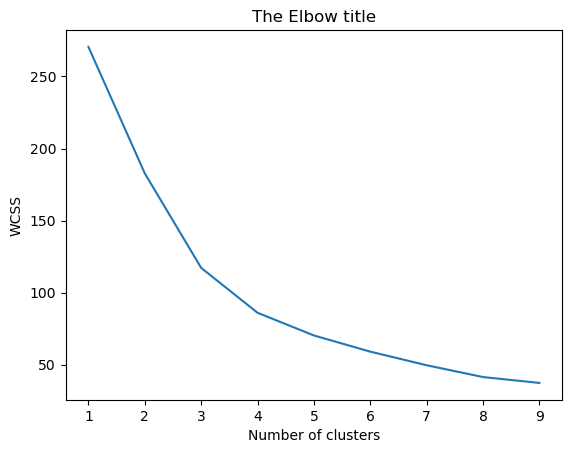

In [186]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(df_geo)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [187]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=24
)

In [188]:
kmeans.fit(df_geo)

KMeans(init='random', n_clusters=4, random_state=24)

In [189]:
labels = kmeans.labels_

In [190]:
# send back into dataframe and display it
df_geo['cluster'] = labels

/tmp/ipykernel_63574/1317798206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['cluster'] = labels


In [191]:
df_geo

latitude  longitude  cluster
0      40.645290 -73.972380        2
1      40.753560 -73.985590        1
2      40.685350 -73.955120        2
3      40.703090 -73.899630        2
4      40.662650 -73.994540        2
...          ...        ...      ...
39877  40.581060 -73.829850        3
39878  40.784590 -74.012530        1
39879  40.723410 -73.722350        3
39880  40.709192 -73.970121        1
39881  40.718350 -74.044160        1

[39850 rows x 3 columns]

In [192]:
# display the number of mamber each clustering
_clusters = df_geo.groupby('cluster').count()
print(_clusters)

         latitude  longitude
cluster                     
0            9565       9565
1           13338      13338
2           13840      13840
3            3107       3107


In [193]:
#Adding a column 'cluster' to filtered df 
df['cluster']=labels
df

id                                      listing_url  \
0                    2539                https://www.airbnb.com/rooms/2539   
1                    2595                https://www.airbnb.com/rooms/2595   
2                    5121                https://www.airbnb.com/rooms/5121   
3                   45910               https://www.airbnb.com/rooms/45910   
4                    5136                https://www.airbnb.com/rooms/5136   
...                   ...                                              ...   
39877            43728504            https://www.airbnb.com/rooms/43728504   
39878            44578886            https://www.airbnb.com/rooms/44578886   
39879            46355090            https://www.airbnb.com/rooms/46355090   
39880  698195550745703168  https://www.airbnb.com/rooms/698195550745703156   
39881            48971505            https://www.airbnb.com/rooms/48971505   

                                                    name  \
0                     Clean & quiet apt home by the park   
1                                  Skylit Midtown Castle   
2                                        BlissArtsSpace!   
3                     Beautiful Queens Brownstone! - 5BR   
4               Spacious Brooklyn Duplex, Patio + Garden   
...                                                  ...   
39877                  Private Modern House by The Beach   
39878               Beautiful apartment - minutes to NYC   
39879                1 Bedroom Basement, NEWLY Renovated   
39880  Luxurious private waterfront terrace, 2BR 2BA Apt   
39881           Just Blocks to Grove PATH and JC Med Ctr   

                                             description  \
0      Renovated apt home in elevator building.<br />...   
1      Beautiful, spacious skylit studio in the heart...   
2      One room available for rent in a 2 bedroom apt...   
3      <b>The space</b><br />Beautiful, fully furnish...   
4      We welcome you to stay in our lovely 2 br dupl...   
...                                                  ...   
39877  Private modern house by the Beach with all com...   
39878  Our apartment is straight across the river fro...   
39879  With easy access to multiple bus stops and the...   
39880  This two bed, two bath apartment overlooking t...   
39881  Very convenient to the Grove St PATH (5 min wa...   

                                   neighborhood_overview  \
0        Close to Prospect Park and Historic Ditmas Park   
1      Centrally located in the heart of Manhattan ju...   
2                                      No text available   
3                                      No text available   
4                                      No text available   
...                                                  ...   
39877  Rockaway Beach is a neighborhood that gives it...   
39878  Our apartment is located in a very interesting...   
39879                                  No text available   
39880                                  No text available   
39881                                  No text available   

                                             picture_url    host_location  \
0      https://a0.muscache.com/pictures/3949d073-a02e...     New York, NY   
1      https://a0.muscache.com/pictures/f0813a11-40b2...     New York, NY   
2      https://a0.muscache.com/pictures/2090980c-b68e...     New York, NY   
3      https://a0.muscache.com/pictures/27117627/19ff...     New York, NY   
4      https://a0.muscache.com/pictures/miso/Hosting-...     New York, NY   
...                                                  ...              ...   
39877  https://a0.muscache.com/pictures/6c950656-b090...     New York, NY   
39878  https://a0.muscache.com/pictures/dd5163c1-7e02...     New York, NY   
39879  https://a0.muscache.com/pictures/64c81ee7-b396...  Floral Park, NY   
39880  https://a0.muscache.com/pictures/miso/Hosting-...     New York, NY   
39881  https://a0.muscache.com/pictures/b12bc7dc-573c...  Jersey City, NJ   

In [194]:
# df.to_csv('out_final_with_cluster.csv') 

In [198]:
# Filteration after clustering
# Now query on input based on user to display top 5 airbnbs
user_price_min=10
user_price_max=500
user_prop_type='Private'
user_accommodates_min = 3
user_accommodates_max = 5
user_max_nights_min= 4
user_max_nights_max= 10
user_min_nights_min = 1
user_min_nights_max = 5

# &(df['accommodates']>=user_accommodates_min)&(df['accommodates']<=user_accommodates_max)

df_filtered = df[(df['price']>= user_price_min)&(df['price']<=user_price_max)\
              &(df['property_type'].str.contains(user_prop_type, na=False))\
              &(df['minimum_nights']>=user_min_nights_min)\
              &(df['minimum_nights']<=user_min_nights_max)&(df['maximum_nights']>=user_min_nights_min)\
              &(df['maximum_nights']<=user_min_nights_max)]\
              .sort_values(by=['review_scores_rating'],ascending = False)\
              .head(5)  

df_filtered       

id                            listing_url  \
39873  35372621  https://www.airbnb.com/rooms/35372621   
13404  23290339  https://www.airbnb.com/rooms/23290339   
20342  39945357  https://www.airbnb.com/rooms/39945357   
19942  39390463  https://www.airbnb.com/rooms/39390463   
19777  39232121  https://www.airbnb.com/rooms/39232121   

                                                   name  \
39873      Huge Room minutes away to NYC. Easy commute!   
13404                                         Cozy room   
20342              Convinient room in Hamilton Heights!   
19942  Wyndham 45 in midtown New York/Near Times Square   
19777                                Old Brooklyn Charm   

                                             description  \
39873                                  No text available   
13404  Window<br /><br /><b>The space</b><br />Very q...   
20342  This apartment is located on the 4th floor of ...   
19942  Wyndham 45 located only blocks from time squar...   
19777  I'm offering the 2nd bedroom of my apartment i...   

                                   neighborhood_overview  \
39873                                  No text available   
13404  Safe neighborhood access to bus and restaurant...   
20342                                  No text available   
19942                                  No text available   
19777  Clinton Hill is a classic, walkable, tree-line...   

                                             picture_url  \
39873  https://a0.muscache.com/pictures/137f93ef-b9ec...   
13404  https://a0.muscache.com/pictures/5e48aff2-a452...   
20342  https://a0.muscache.com/pictures/513eb2cc-8453...   
19942  https://a0.muscache.com/pictures/a9772af4-a49b...   
19777  https://a0.muscache.com/pictures/8c8f0de6-962b...   

                 host_location  \
39873         North Bergen, NJ   
13404  New York, United States   
20342  New York, United States   
19942              Lincoln, RI   
19777             New York, NY   

                                              host_about host_response_rate  \
39873  Wether you think you can or can’t...you’re rig...               80.0   
13404                                  No text available              100.0   
20342                                  No text available                0.0   
19942                                  No text available                0.0   
19777  Writer/editor. Grew up in California, but live...               89.0   

      host_acceptance_rate  ... review_scores_communication  \
39873                 67.0  ...                         5.0   
13404                 50.0  ...                         4.0   
20342                  0.0  ...                         5.0   
19942                  0.0  ...                         5.0   
19777                 91.0  ...                         5.0   

      review_scores_location review_scores_value instant_bookable  \
39873                    5.0                 5.0                t   
13404                    5.0                 5.0                f   
20342                    5.0                 5.0                f   
19942                    5.0                 3.0                t   
19777                    5.0                 5.0                f   

       calculated_host_listings_count  \
39873                             1.0   
13404                             2.0   
20342                             1.0   
19942                             1.0   
19777                             1.0   

      calculated_host_listings_count_entire_homes  \
39873                                         0.0   
13404                                         0.0   
20342                                         0.0   
19942                                         0.0   
19777                                         0.0   

      calculated_host_listings_count_private_rooms  \
39873                                          1.0   
13404                                          2.0   
20342                   

In [199]:

# I have created another table airbnb_final_cluster with cluster info, so we can query the table also.

conn_string = 'postgresql://cse6242_user:cse6242_pw@db:5432/cse6242_data'
db = create_engine(conn_string)
conn = db.connect()
conn1 = psycopg2.connect(
    database='cse6242_data',
    user='cse6242_user', 
  password='cse6242_pw', 
  host='db', 
  port= '5432'
)
conn1.autocommit = True

user_price_min=10
user_price_max=500
user_prop_type='Private'
user_accommodates_min = 3
user_accommodates_max = 5
user_max_nights_min= 4
user_max_nights_max= 10
user_min_nights_min = 1
user_min_nights_max = 5

# accommodates BETWEEN {user_accommodates_min} AND {user_accommodates_max}

sql1 = f"select * from airbnb_final_cluster where price BETWEEN {user_price_min} and {user_price_max} and \
property_type LIKE '{user_prop_type}%' and \
minimum_nights BETWEEN {user_min_nights_min} and {user_min_nights_max} and \
maximum_nights BETWEEN {user_max_nights_min} and {user_max_nights_max} ORDER BY review_scores_rating DESC LIMIT 5;"

df_filt = pd.read_sql_query(sql1,conn1)

df_filt['id']=df_filt['id'].astype('int')
df_filt = df_filt.iloc[:,1:]
df_filt


/tmp/ipykernel_63574/2593311980.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_filt = pd.read_sql_query(sql1,conn1)


id                           listing_url  \
0  7841464  https://www.airbnb.com/rooms/7841464   
1  7747237  https://www.airbnb.com/rooms/7747237   
2  6922758  https://www.airbnb.com/rooms/6922758   
3  4285522  https://www.airbnb.com/rooms/4285522   
4  8398566  https://www.airbnb.com/rooms/8398566   

                                                name  \
0                           Williamsburg Crow's Nest   
1       Central Harlem private bedroom in the garden   
2     Scandi Apartment w/ Roofdeck & Manhattan Views   
3  Spacious Queen Bed w/priv bath - Harlem Browns...   
4                    Room in 1-Br by Columbus Circle   

                                         description  \
0  Private, sunny bedroom in a cute, well-appoint...   
1  This cozy garden level room is in our historic...   
2  Welcome in our beautiful family home! Our apar...   
3  Large bedroom with sitting alcove, w/queen bed...   
4  Private Bedroom  in warm pre-war 1-BR with hig...   

                               neighborhood_overview  \
0                                  No text available   
1  Central Harlem is bursting with exciting devel...   
2  The thriving Carroll Gardens/Cobble Hill neigh...   
3                           Convenient neighborhood.   
4  Close to Central Park and Hell's Kitchen. Grea...   

                                         picture_url host_location  \
0  https://a0.muscache.com/pictures/99843579/dc5d...  New York, NY   
1  https://a0.muscache.com/pictures/miso/Hosting-...  New York, NY   
2  https://a0.muscache.com/pictures/dde3dc70-ad1d...  New York, NY   
3  https://a0.muscache.com/pictures/55529724/eaea...  New York, NY   
4  https://a0.muscache.com/pictures/d3bbed57-9918...  New York, NY   

                                          host_about  host_response_rate  \
0                                  No text available                 0.0   
1  Graham is a professional musician with deep co...               100.0   
2  Hi! I am originally from Vienna, Austria. I li...                56.0   
3  Harlem is vibrant and high energy with somethi...                75.0   
4  University Professor living in NYC. Likes to t...                 0.0   

   host_acceptance_rate  ... review_scores_communication  \
0                   0.0  ...                         5.0   
1                  93.0  ...                         5.0   
2                  40.0  ...                         5.0   
3                  69.0  ...                         5.0   
4                   0.0  ...                         5.0   

  review_scores_location review_scores_value  instant_bookable  \
0                   5.00                5.00                 f   
1                   5.00                5.00                 f   
2                   5.00                4.25                 f   
3                   4.89                5.00                 f   
4                   5.00                5.00                 f   

   calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                             1.0                                         0.0   
1                             3.0                                         2.0   
2                             2.0                                         0.0   
3                             1.0                                         0.0   
4                             1.0                                         0.0   

  calculated_host_listings_count_private_rooms  \
0                                          1.0   
1                                          1.0   
2                                          2.0   
3                                          1.0   
4                                          1.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  cluster  
0                                         0.0              0.02        2  
1                                         0.0              0.02        0  
2                                  

In [207]:
conn_string = 'postgresql://cse6242_user:cse6242_pw@db:5432/cse6242_data'
db = create_engine(conn_string)
conn = db.connect()
conn1 = psycopg2.connect(
    database='cse6242_data',
    user='cse6242_user', 
  password='cse6242_pw', 
  host='db', 
  port= '5432'
)
conn1.autocommit = True

user_price_min=10
user_price_max=500
user_prop_type='Private'
user_accommodates_min = 3
user_accommodates_max = 5
user_max_nights_min= 4
user_max_nights_max= 10
user_min_nights_min = 1
user_min_nights_max = 5

sql_for_knn = f"select * from airbnb_final_cluster where price BETWEEN {user_price_min} and {user_price_max} and \
property_type LIKE '{user_prop_type}%' and \
minimum_nights BETWEEN {user_min_nights_min} and {user_min_nights_max} and \
maximum_nights BETWEEN {user_max_nights_min} and {user_max_nights_max};"

df_for_knn = pd.read_sql_query(sql_for_knn,conn1)
df_for_knn

/tmp/ipykernel_63574/1122140914.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_for_knn = pd.read_sql_query(sql_for_knn,conn1)


index        id                            listing_url  \
0      260    179670    https://www.airbnb.com/rooms/179670   
1      417    322604    https://www.airbnb.com/rooms/322604   
2      507    373618    https://www.airbnb.com/rooms/373618   
3      595    580323    https://www.airbnb.com/rooms/580323   
4      646    517626    https://www.airbnb.com/rooms/517626   
..     ...       ...                                    ...   
574  39483  20412344  https://www.airbnb.com/rooms/20412344   
575  39602  53433266  https://www.airbnb.com/rooms/53433266   
576  39673  37859909  https://www.airbnb.com/rooms/37859909   
577  39768  53877859  https://www.airbnb.com/rooms/53877859   
578  39841  35372621  https://www.airbnb.com/rooms/35372621   

                                                  name  \
0                     High-end doorman bldg in the LES   
1    Artist Loft-McCarren Park-Williamsburg-Brookly...   
2    Authentic designer loft/roof deck best William...   
3       UES 1Huge BR avail in sweet 2BR apt, I host :)   
4                          Above Graham stop - L train   
..                                                 ...   
574        Cozy Condo in Trendy Neighborhood –Near NYC   
575  NYC 20min / Hudson River/ 1bed & 1 bath (Sojo ...   
576                              Quaint & Cozy Cottage   
577  Cozy private room for Women/Couples in sm. cot...   
578       Huge Room minutes away to NYC. Easy commute!   

                                           description  \
0    <b>The space</b><br />Welcome [to my apt]!<br ...   
1    ** Please send me a message ,  before trying t...   
2    * Thanks for indicating basic purpose of trip ...   
3    PLZ READ THE LISTING & GUESTS REQUIREMENTS BEF...   
4    <b>The space</b><br />Charming Williamsburg ap...   
..                                                 ...   
574  Located in the heart of Hoboken, this safe and...   
575  Keep it simple at this peaceful and centrally-...   
576  This charming home is near all!<br /><br /> St...   
577  Because of only 1 bathroom shared with female ...   
578                                  No text available   

                                 neighborhood_overview  \
0    * East Village/Lower East Side border (right o...   
1    This is the best neighborhood in NYC..!<br />o...   
2    There are so many things to see, eat, drink, h...   
3    I love my neighborhood!  I have lived here for...   
4                                    No text available   
..                                                 ...   
574  Big city vibe complete with trendy restaurants...   
575                                  No text available   
576                                  No text available   
577                                  No text available   
578                                  No text available   

                                           picture_url     host_location  \
0    https://a0.muscache.com/pictures/1cf729fc-c2d0...      New York, NY   
1    https://a0.muscache.com/pictures/25438492/5fc6...      New York, NY   
2    https://a0.muscache.com/pictures/c7061608-03c9...      New York, NY   
3    https://a0.muscache.com/pictures/87b999c6-762f...      New York, NY   
4    https://a0.muscache.com/pictures/30557454/68d4...      New York, NY   
..                                                 ...               ...   
574  https://a0.muscache.com/pictures/21c90972-6719...       Hoboken, NJ   
575  https://a0.muscache.com/pictures/9d1e5c16-4f2e...      New York, NY   
576  https://a0.muscache.com/pictures/555a97ad-9c30...     Edgewater, NJ   
577  https://a0.muscache.com/pictures/miso/Hosting-...      New York, NY   
578  https://a0.muscache.com/pictures/137f93ef-b9ec...  North Bergen, NJ   

                                            host_about  host_response_rate  \
0    i'm an easygoing, sociable, professional who l...               100.0   
1    Artist/Photographer\r\nwith a Sweet Bedroom in...               100.0   
2    Hi, I

In [247]:
# we will repeat clustering steps before we do KNN. So lets say we repeated those and we added cluster column in above df_for_knn
# ( although it is there, it wont be if we do clustering after filtering)


# X -> select what columns we want as independent 
# y -> dependent column is the target which will tell category of that data point, "cluster"

# to start with, take K as the sqrt of total data points and make it odd number if it comes as even. This depends 
# on rows we get from above filtering. So, k = sqrt(len(df)) ~24 , but we will take 23

# we can only work with numeric cols on algorithms
X = df_for_knn[['host_response_rate','host_acceptance_rate','host_listings_count','host_total_listings_count','latitude','longitude',
                 'accommodates','bedrooms', 'beds','price','minimum_nights','maximum_nights','availability_365','number_of_reviews',
                 'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                 'review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count',
                 'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                 'calculated_host_listings_count_shared_rooms','reviews_per_month']]


# X = df[['price','property_type','minimum_nights','maximum_nights','accommodates']]
y = df_for_knn[['cluster']]


# build KNN on the filtered data above
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [280]:
# trying out different values of k to find best
import math
d={}
length = int(math.sqrt(int(len(df_for_knn))))
for i in range(1,length):
    knn = KNeighborsClassifier(n_neighbors=i,p=2,metric ='euclidean')
    knn.fit(X_train,y_train)
    d[i]=knn.score(X_test,y_test)

best_k = max(d.items(), key=operator.itemgetter(1))[0]



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [284]:
# use best_k to fit the model
classifier = KNeighborsClassifier(n_neighbors=best_k,p=2,metric ='euclidean')
classifier.fit(X_train,y_train)

# test the prediction score on test data
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(score)

# checking how it does on train data-> not required and not ideal
y_pred_train = classifier.predict(X_train)
score_train =accuracy_score(y_train,y_pred_train)
print(score_train)

0.8448275862068966
0.8682505399568035


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [285]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[30  1  4  0]
 [ 1 12  5  0]
 [ 1  4 47  0]
 [ 1  0  1  9]]
